In [1]:
from commonfunctions import * 
from skimage import color

In [2]:
def color_transfer_lab(content,style):
    #convert images to LAB space
    style_lab = color.rgb2lab(style)
    content_lab = color.rgb2lab(content)
    #calculate mean
    content_mu = np.mean(content_lab,axis=tuple(range(2)))
    style_mu = np.mean(style_lab,axis=tuple(range(2)))
    #calculate standard divation
    content_std = np.std(content_lab,axis=tuple(range(2)))
    style_std = np.std(style_lab,axis=tuple(range(2)))
    #transfer
    content_lab = (content_lab - content_mu + style_mu) * (content_std/style_std)
    #convert back to RGB
    content_rgb = color.lab2rgb(content_lab)
    #show reansfered image
    show_images([content,style,content_rgb],["Original","Style","Colored"])

/home/rka/miniconda3/envs/py36tf/lib/python3.6/site-packages/skimage/color/colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 4236 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


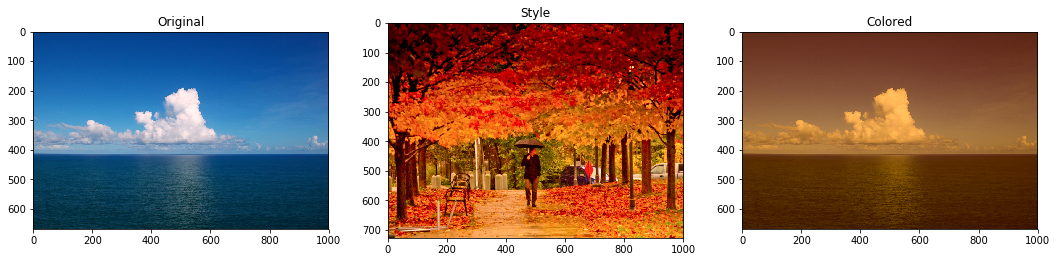

In [5]:
content = np.array(io.imread('images/ocean_day.jpg'))
style = np.array(io.imread('images/autumn.jpg'))
color_transfer_lab(content,style)